In [1]:
import torch
import torch.nn as nn 
import input_layer

InputLayer = input_layer.VitInputLayer()


In [6]:
batch_size, channel, height, width = 2, 3, 32, 32
x = torch.randn( batch_size, channel, height, width)
z_0 = InputLayer( x )

# バッチサイズ：2 トークン数：5 埋め込みベクトルの長さ：384
z_0.size()

torch.Size([2, 5, 384])

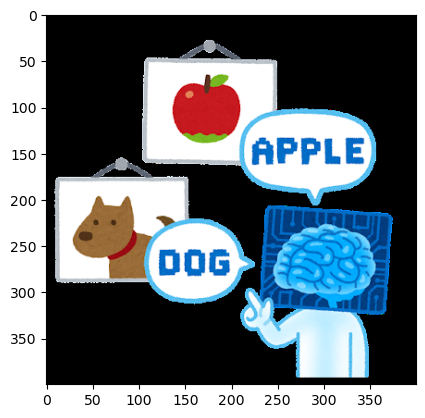

In [3]:
import cv2
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

img = cv2.imread('./ai_image_gazou_ninshiki.png')

#画像の表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # OpenCV は色がGBR順なのでRGB順に並べ替える
plt.show()

In [4]:
# Tensorに変換
img_tensor = torch.from_numpy(img)

output = InputLayer(img_tensor)

RuntimeError: Given groups=1, weight of size [384, 3, 16, 16], expected input[1, 400, 400, 3] to have 3 channels, but got 400 channels instead